# Research Calculations and Results for NiaNetCAE Paper

This Jupyter Notebook contains the calculations and experiments conducted for the research paper titled "Harnessing Nature-Inspired Algorithms for Automated Neural Architecture Search of Convolutional Autoencoder Architectures in Depth Estimation." 

## Contents

- **Introduction**: Overview of the research objectives and methods.
- **Data Preprocessing**: Steps for preparing the dataset used in the experiments.
- **Model Training**: Detailed code for training the Convolutional Autoencoders (CAEs) using Nature-Inspired Algorithms (NIAs).
- **Evaluation**: Methods and metrics for evaluating model performance.
- **Results**: Visualization and analysis of the results obtained.

### Open the database and read the solutions

In [9]:
import mk
import pandas as pd
import sqlite3

# Create your connection.
cnx = sqlite3.connect('logs/solution.db')

df_solutions = pd.read_sql_query("SELECT * FROM solutions", cnx)
cnx.commit()
cnx.close()
df_solutions = df_solutions[df_solutions['fitness'] <= 4000]

df_solutions.head(10)


,hash_id,timestamp,algorithm_name,iteration,activation,optimizer,encoding_layers,decoding_layers,num_layers,bottleneck_size,...,MSE,RMSE,MAE,ABS_REL,LOG10,DELTA1,DELTA2,DELTA3,CADL,solution_array
0,dc272d6cf58c25a4241afe947bc5c4f7cf2f0b9e,03:21 18-08-2023,ParticleSwarmAlgorithm,1,CELU,Adagrad,"ModuleList(\n (0): Conv2d(3, 295, kernel_size...","ModuleList(\n (0): ConvTranspose2d(295, 1, ke...",1,152,...,8.752117,2.958398,2.451226,5.852947,971.534058,0.256184,0.300030,0.381448,142.962845,"[0.9710766121566622, 0.49098581411848896, 0.74..."
2,87221babc25a2ce91082bc280f9a05d7abd02d3e,05:45 18-08-2023,ParticleSwarmAlgorithm,1,TANH,Adagrad,"ModuleList(\n (0): Conv2d(3, 3, kernel_size=(...","ModuleList(\n (0): ConvTranspose2d(27, 24, ke...",47,1,...,6.429847,2.535714,2.031709,8.362244,1042.885986,0.322310,0.403383,0.523606,119.542633,"[0.012717799425234544, 0.4711765125844729, 0.8..."
3,13373e3867c711dc71520c5dcf8d1efb6cb77439,07:36 18-08-2023,ParticleSwarmAlgorithm,1,GELU,ASGD,"ModuleList(\n (0): Conv2d(3, 279, kernel_size...","ModuleList(\n (0): ConvTranspose2d(279, 1, ke...",1,152,...,6.879367,2.622855,2.086601,6.881074,1658.415649,0.310494,0.384610,0.494374,123.457573,"[0.9197334634424169, 0.3103127151459234, 0.816..."
4,de96809bb25ac7dee7dba4fd256c484fa9b2f19c,08:44 18-08-2023,ParticleSwarmAlgorithm,2,Leaky RELU,RAdam,"ModuleList(\n (0): Conv2d(3, 245, kernel_size...","ModuleList(\n (0): ConvTranspose2d(245, 1, ke...",1,152,...,6.914970,2.629633,2.084672,11.390865,3271.623779,0.303147,0.376913,0.487006,123.012238,"[0.8070219311175996, 0.859765147120731, 0.2608..."
5,8daa454f8b72893ab5aec5271ed4e93fdae8b507,11:15 18-08-2023,ParticleSwarmAlgorithm,2,Leaky RELU,SGD,"ModuleList(\n (0): Conv2d(3, 168, kernel_size...","ModuleList(\n (0): ConvTranspose2d(336, 168, ...",2,76,...,6.257961,2.501592,2.006072,6.982789,901.591553,0.332549,0.416203,0.537139,117.946358,"[0.5538300972133227, 0.4528997002797993, 0.348..."
6,a40961bf93d271ff8c1373e11a680c759400d129,12:25 18-08-2023,ParticleSwarmAlgorithm,2,TANH,Adagrad,"ModuleList(\n (0): Conv2d(3, 51, kernel_size=...","ModuleList(\n (0): ConvTranspose2d(204, 153, ...",4,19,...,8.000542,2.828523,2.301531,17.819263,1473.887329,0.250654,0.308354,0.408347,135.207336,"[0.1707490731613004, 0.7012144473134904, 0.980..."
10,8730c81dcd47385f488412fb6b73254a0e9a20e8,15:07 28-09-2023,ParticleSwarmAlgorithm,1,RELU,Adagrad,"ModuleList(\n (0): Conv2d(3, 202, kernel_size...","ModuleList(\n (0): ConvTranspose2d(404, 202, ...",2,76,...,6.925721,2.631676,2.104019,17.812155,1883.463501,0.294779,0.368754,0.484663,123.469414,"[0.6672552234652567, 0.35758444797472055, 0.24..."
12,e9decec29f0fedad69cd51aca5fb692a4d57be56,15:41 28-09-2023,ParticleSwarmAlgorithm,1,SELU,ASGD,"ModuleList(\n (0): Conv2d(3, 176, kernel_size...","ModuleList(\n (0): ConvTranspose2d(352, 176, ...",2,76,...,7.833205,2.798786,2.280233,8.718953,1342.730713,0.274139,0.333841,0.432350,133.682541,"[0.5797608820563144, 0.024631440111434477, 0.6..."
13,8f4b6e251e7f9cfa6b2d0c37136101052dbae22f,18:46 28-09-2023,ParticleSwarmAlgorithm,2,RRELU,SGD,"ModuleList(\n (0): Conv2d(3, 27, kernel_size=...","ModuleList(\n (0): ConvTranspose2d(162, 135, ...",6,5,...,6.869549,2.620982,2.096408,15.977495,1452.832153,0.297267,0.371877,0.488764,123.054214,"[0.09068296841560741, 0.5477015650676068, 0.48..."
14,ba14b07c86334c9c74d39f7eaddc44e546754deb,20:26 28-09-2023,ParticleSwarmAlgorithm,2,SELU,RAdam,"ModuleList(\n (0): Conv2d(3, 266, kernel_size...","ModuleList(\n (0): ConvTranspose2d(266, 1, ke...",1,152,...,7.661369,2.767918,2.238366,4.058030,881.678040,0.302926,0.378062,0.482469,131.859192,"[0.8754358946578918, 0.45166039755667053, 0.55..."


### Display search statistics

In [10]:
# Calculate the number of models run per day on average
num_models_per_day = df_solutions.groupby(['timestamp']).size().mean()

# Assuming you know the total number of days the search ran:
total_days = df_solutions['timestamp'].nunique()

# If you're using 4 GPUs every day, then the total GPU days would be:
total_gpu_days = total_days * 4  # 4 GPUs running each day

print("Number of models per day: ", num_models_per_day)
print("Total number of days the search ran: ", total_days)
print("Total number of GPU days for the entire search: ", total_gpu_days)


Number of models per day:  1.0208643815201193
Total number of days the search ran:  1342
Total number of GPU days for the entire search:  5368


#### Preprocessing algorithms values with abbreviations

In [11]:
algorithm_abbreviations = {
    'DifferentialEvolution': 'DE',
    'FireflyAlgorithm': 'FA',
    'GeneticAlgorithm': 'GA',
    'ParticleSwarmAlgorithm': 'PSO',
    'SelfAdaptiveDifferentialEvolution': 'SADE'
}
df_solutions['algorithm_name'] = df_solutions['algorithm_name'].replace(algorithm_abbreviations)

### Fitness value distribution by algorithm

In [12]:
statistics_df = df_solutions.groupby('algorithm_name')['fitness'].agg(
    Mean='mean',
    Median='median',
    SD='std',
    Min='min',
    Max='max'
)
statistics_df = statistics_df.round(0)
statistics_df

,Mean,Median,SD,Min,Max
algorithm_name,,,,,
DE,1755.0,1687.0,666.0,324,3974
FA,1704.0,1621.0,619.0,202,3988
GA,1821.0,1728.0,700.0,205,3966
PSO,1727.0,1631.0,698.0,202,3860
SADE,1728.0,1648.0,657.0,232,3926


In [13]:
df_solutions


,hash_id,timestamp,algorithm_name,iteration,activation,optimizer,encoding_layers,decoding_layers,num_layers,bottleneck_size,...,MSE,RMSE,MAE,ABS_REL,LOG10,DELTA1,DELTA2,DELTA3,CADL,solution_array
0,dc272d6cf58c25a4241afe947bc5c4f7cf2f0b9e,03:21 18-08-2023,PSO,1,CELU,Adagrad,"ModuleList(\n (0): Conv2d(3, 295, kernel_size...","ModuleList(\n (0): ConvTranspose2d(295, 1, ke...",1,152,...,8.752117,2.958398,2.451226,5.852947,971.534058,0.256184,0.300030,0.381448,142.962845,"[0.9710766121566622, 0.49098581411848896, 0.74..."
2,87221babc25a2ce91082bc280f9a05d7abd02d3e,05:45 18-08-2023,PSO,1,TANH,Adagrad,"ModuleList(\n (0): Conv2d(3, 3, kernel_size=(...","ModuleList(\n (0): ConvTranspose2d(27, 24, ke...",47,1,...,6.429847,2.535714,2.031709,8.362244,1042.885986,0.322310,0.403383,0.523606,119.542633,"[0.012717799425234544, 0.4711765125844729, 0.8..."
3,13373e3867c711dc71520c5dcf8d1efb6cb77439,07:36 18-08-2023,PSO,1,GELU,ASGD,"ModuleList(\n (0): Conv2d(3, 279, kernel_size...","ModuleList(\n (0): ConvTranspose2d(279, 1, ke...",1,152,...,6.879367,2.622855,2.086601,6.881074,1658.415649,0.310494,0.384610,0.494374,123.457573,"[0.9197334634424169, 0.3103127151459234, 0.816..."
4,de96809bb25ac7dee7dba4fd256c484fa9b2f19c,08:44 18-08-2023,PSO,2,Leaky RELU,RAdam,"ModuleList(\n (0): Conv2d(3, 245, kernel_size...","ModuleList(\n (0): ConvTranspose2d(245, 1, ke...",1,152,...,6.914970,2.629633,2.084672,11.390865,3271.623779,0.303147,0.376913,0.487006,123.012238,"[0.8070219311175996, 0.859765147120731, 0.2608..."
5,8daa454f8b72893ab5aec5271ed4e93fdae8b507,11:15 18-08-2023,PSO,2,Leaky RELU,SGD,"ModuleList(\n (0): Conv2d(3, 168, kernel_size...","ModuleList(\n (0): ConvTranspose2d(336, 168, ...",2,76,...,6.257961,2.501592,2.006072,6.982789,901.591553,0.332549,0.416203,0.537139,117.946358,"[0.5538300972133227, 0.4528997002797993, 0.348..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,8c7297fc96247d1b6664e30a941189baa67e62e3,18:19 05-02-2024,DE,6,CELU,RPROP,"ModuleList(\n (0): Conv2d(3, 82, kernel_size=...","ModuleList(\n (0): ConvTranspose2d(246, 164, ...",3,38,...,2.700285,1.643255,1.260109,0.575114,559.906921,0.590446,0.651203,0.686440,72.391876,"[0.2702811928390515, 0.9007326137827373, 0.729..."
1724,9648552d02981d1d24fecaad9f3cf95163947bf6,00:12 06-02-2024,DE,7,CELU,Adam,"ModuleList(\n (0): Conv2d(3, 266, kernel_size...","ModuleList(\n (0): ConvTranspose2d(266, 1, ke...",1,152,...,7.127074,2.669658,2.147215,8.575384,1358.997437,0.300135,0.371319,0.476936,126.490776,"[0.87694672336312, 0.6416743283850415, 0.73047..."
1726,e24733f601b17a819790ab8b50ab874ac127037e,04:54 06-02-2024,DE,10,RRELU,Adagrad,"ModuleList(\n (0): Conv2d(3, 100, kernel_size...","ModuleList(\n (0): ConvTranspose2d(100, 1, ke...",1,152,...,6.549220,2.559144,2.045758,8.381670,1326.169556,0.321277,0.401100,0.515570,120.921638,"[0.3313593840795479, 0.41119044824905493, 0.42..."
1727,14c2ba684a30f9edab46bf80ed4db4a7cb0b8978,10:19 06-02-2024,DE,11,SELU,Adam,"ModuleList(\n (0): Conv2d(3, 122, kernel_size...","ModuleList(\n (0): ConvTranspose2d(244, 122, ...",2,76,...,6.494125,2.548357,2.041430,6.868888,1141.205933,0.330106,0.408889,0.521957,120.872482,"[0.40450203209051583, 0.6927507140298672, 0.58..."


In [14]:
import plotly.graph_objects as go
fig = go.Figure()

# Adding box plots for each unique algorithm in the DataFrame
for algorithm in df_solutions['algorithm_name'].unique():
    fig.add_trace(go.Box(
        y=df_solutions[df_solutions['algorithm_name'] == algorithm]['fitness'],
        name=algorithm
    ))

# Adding plot layout information
fig.update_layout(
    xaxis_title="Algorithm",
    yaxis_title="Fitness",
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
        ),
    width=1600,
    height=450,
)

fig.show()
fig.write_image("plot_boxplot.svg")

In [15]:
import numpy as np
def boxplot_stats(group):
    q1 = np.percentile(group, 25)
    q3 = np.percentile(group, 75)
    median = np.median(group)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    min_val = np.min(group)
    max_val = np.max(group)
    
    return {
        "min": min_val,
        "q1": q1,
        "median": median,
        "q3": q3,
        "max": max_val,
        "upper_fence": upper_fence
    }

# Group data by 'algorithm_name' and calculate stats
algorithm_stats = {algorithm: boxplot_stats(group['fitness'].values) 
                   for algorithm, group in df_solutions.groupby('algorithm_name')}

# Print the statistics for each algorithm
# Creating a DataFrame from the dictionary
stats_df = pd.DataFrame.from_dict(algorithm_stats, orient='index')

# Optionally, you can reset the index to have the algorithm names as a separate column
stats_df.reset_index(inplace=True)
stats_df.rename(columns={'index': 'Algorithm'}, inplace=True)
stats_df

,Algorithm,min,q1,median,q3,max,upper_fence
0,DE,324,1318.00,1687.0,2156.50,3974,3414.250
1,FA,202,1262.50,1621.0,2063.00,3988,3263.750
2,GA,205,1352.25,1728.5,2210.50,3966,3497.875
3,PSO,202,1185.25,1631.0,2189.25,3860,3695.250
4,SADE,232,1289.50,1648.0,2087.25,3926,3283.875


### Fitness value by algorithm over iterations

In [16]:
# Assuming 'df_algo' is the DataFrame for one algorithm
window_size = 24  # Number of iterations to consider for the rolling mean
min_periods = 12  # Increase this number to require more points before calculating the mean

def calculate_rolling_statistics(df, constant):
    """
    Calculate rolling statistics for the given constant over different algorithms.
    
    :param df: DataFrame containing the solutions' data.
    :param constant: The column name for which to calculate the statistics.
    :return: A tuple of lists containing x_values, y_values, algorithms, means, and deviations.
    """
    algorithms = df['algorithm_name'].unique()
    x_values, y_values, means, deviations = [], [], [], []

    for algorithm in algorithms:
        df_algo = df[df['algorithm_name'] == algorithm].copy()
        df_algo['timestamp'] = pd.to_datetime(df_algo['timestamp'], format='%H:%M %d-%m-%Y')

        df_algo.sort_values(by='timestamp', ascending=True, inplace=True)
        df_algo['iteration'] = range(df_algo.shape[0])
        
        df_algo[f'{constant}_mean'] = df_algo[constant].rolling(window=window_size, min_periods=min_periods).mean()
        df_algo[f'{constant}_std'] = df_algo[constant].rolling(window=window_size, min_periods=min_periods).std()

        
        x_values.append(df_algo['iteration'].to_numpy())
        y_values.append(df_algo[constant].to_numpy())
        means.append(df_algo[f'{constant}_mean'].to_numpy())
        deviations.append(df_algo[f'{constant}_std'].to_numpy())

    # Select oonly rows which has iteration lower than 250
    x_values = [x[:250] for x in x_values]
    y_values = [y[:250] for y in y_values]
    return x_values, y_values, algorithms, means, deviations


In [17]:
import pymannkendall as mk
def plot_rolling_statistics(x_values, y_values, algorithms, means, df, constant):
    """
    Plot rolling statistics using Plotly Express.
    
    :param x_values: List of x_values for each algorithm.
    :param y_values: List of y_values for each algorithm.
    :param algorithms: List of algorithm names.
    :param means: List of mean values for each algorithm.
    :param df: Original DataFrame for additional plot elements.
    :param constant: The constant column name used in the statistics.
    """
    # Prepare DataFrame for Plotly
    plot_df = pd.DataFrame({
        'iteration': sum([list(x) for x in x_values], []),
        constant: sum([list(y) for y in y_values], []),
        'algorithm': sum([[algo] * len(x) for algo, x in zip(algorithms, x_values)], [])
    })   


    # Create the scatter plot
    fig = go.Figure()
    fig.update_layout(
        autosize=False,
        width=1600,
        height=450,
        xaxis=dict(range=[0, 250]),
        yaxis=dict(range=[1000, 2500]),
         legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="center",
            x=0.5
        )
    )
    
    # Add trend lines
    for mean, algorithm in zip(means, algorithms):
        trend = mk.original_test(mean).trend
        if trend == "no trend":
            trend = "(Trend: No change)"
        elif trend == "increasing":
            trend = "(Trend: Increasing)"
        elif trend == "decreasing":
            trend = "(Trend: Decreasing)"
        else:
            trend = "No Trend Detected"
        fig.add_scatter(x=plot_df[plot_df['algorithm'] == algorithm]['iteration'], y=mean, mode='lines', name=f'{algorithm}:{trend}')
    


    fig.show()
    fig.write_image("plot_rolling_statistics.svg")

# Function calls (comment out before running and use your own DataFrame and CONSTANT)
CONSTANT = 'fitness'


x_values, y_values, algorithms, means, deviations = calculate_rolling_statistics(df_solutions, CONSTANT)
plot_rolling_statistics(x_values, y_values, algorithms, means, df_solutions, CONSTANT)


### Statistical Significance Testing and Nova Analysis

In [18]:
df_bootstrapped = pd.DataFrame({
    'iteration': sum([list(x) for x in x_values], []),
    'fitness': sum([list(y) for y in y_values], []),
    'algorithm': sum([[algo] * len(x) for algo, x in zip(algorithms, x_values)], [])
})

In [19]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def bootstrap_confidence_intervals(df, num_bootstraps, confidence_level):
    """
    Calculate bootstrapped confidence intervals for each algorithm.
    
    :param df: DataFrame with 'algorithm', 'iteration', and 'fitness' columns.
    :param num_bootstraps: Number of bootstrap samples.
    :param confidence_level: Confidence level for the intervals.
    :return: DataFrame with bootstrapped confidence intervals.
    """
    
    # https://acclab.github.io/bootstrap-confidence-intervals.html
    bootstrapped_data = []
    
    for algorithm in df_bootstrapped['algorithm'].unique():
        for iteration in df_bootstrapped['iteration'].unique():
            iteration_fitness = df_bootstrapped[(df_bootstrapped['algorithm'] == algorithm) & (df_bootstrapped['iteration'] == iteration)]['fitness']
            
            # Skip if no data for the iteration
            if iteration_fitness.empty:
                continue
            
            bootstrap_means = []
            # Generate bootstrap samples
            for _ in range(num_bootstraps):
                bootstrap_sample = np.random.choice(iteration_fitness, size=len(iteration_fitness), replace=True)
                bootstrap_means.append(np.mean(bootstrap_sample))
            
            # Calculate the confidence intervals
            lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
            upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
            mean_value = np.mean(bootstrap_means)
            
            # Collect data for this algorithm and iteration
            bootstrapped_data.append({
                'algorithm': algorithm,
                'iteration': iteration,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'mean_fitness': mean_value
            })
    
    return pd.DataFrame(bootstrapped_data)

def plot_bootstrapped_intervals(bootstrap_df):
    """
    Plot bootstrapped confidence intervals using Plotly.
    
    :param bootstrap_df: DataFrame with bootstrapped confidence intervals.
    """
    fig = go.Figure()
    
    for algorithm in bootstrap_df['algorithm'].unique():
        df_algo = bootstrap_df[bootstrap_df['algorithm'] == algorithm]
        
        # Add the mean fitness trace
        fig.add_trace(go.Scatter(
            name=f'{algorithm} Mean Fitness',
            x=df_algo['iteration'],
            y=df_algo['mean_fitness'],
            mode='lines',
            line=dict(width=2),
        ))
        
        # Add the confidence interval trace
        fig.add_traces([
            go.Scatter(
                name=f'{algorithm} Lower Bound',
                x=df_algo['iteration'],
                y=df_algo['lower_bound'],
                mode='lines',
                line=dict(width=0),
                showlegend=False
            ),
            go.Scatter(
                name=f'{algorithm} Upper Bound',
                x=df_algo['iteration'],
                y=df_algo['upper_bound'],
                mode='lines',
                line=dict(width=0),
                fill='tonexty',
                fillcolor='rgba(68, 68, 68, 0.3)',
                showlegend=False
            )
        ])
    
    fig.update_layout(
        title='Bootstrapped Confidence Intervals for Mean Fitness per Algorithm and Iteration',
        xaxis_title='Iteration',
        yaxis_title='Mean Fitness',
        hovermode="x"
    )
    
    fig.show()

# Assuming 'df' is your DataFrame with 'algorithm', 'iteration', and 'fitness' columns
num_bootstraps = 1000
confidence_level = 0.95
bootstrap_df = bootstrap_confidence_intervals(df_bootstrapped, num_bootstraps, confidence_level)
plot_bootstrapped_intervals(bootstrap_df)


### Fitness value distribution by algorithm - Bootstrapped

In [20]:
# Calculate the statistics for the bootstrapped data
bootstrapped_statistics_df = bootstrap_df.groupby('algorithm')['mean_fitness'].agg(
    Mean='mean',
    Median='median',
    SD='std',
    Min='min',
    Max='max'
)
bootstrapped_statistics_df = bootstrapped_statistics_df.round(0)
bootstrapped_statistics_df

,Mean,Median,SD,Min,Max
algorithm,,,,,
DE,1746.0,1684.0,664.0,324.0,3974.0
FA,1693.0,1620.0,612.0,202.0,3988.0
GA,1821.0,1728.0,703.0,205.0,3966.0
PSO,1718.0,1625.0,675.0,202.0,3860.0
SADE,1731.0,1656.0,654.0,232.0,3865.0


In [21]:
import pandas as pd
import plotly.graph_objs as go
from math import pi, sin
from sklearn.preprocessing import QuantileTransformer

# Assuming df_solutions is your original DataFrame with the data
selected_columns = ['algorithm_name', 'num_layers', 'bottleneck_size', 'complexity', 'fitness', 'error']
df_selected = df_solutions[selected_columns]
# Rename bottleneck_size to bottleneck size and num_layers to num layers
df_selected.rename(columns={'bottleneck_size': 'bottleneck size', 'num_layers': 'num layers'}, inplace=True)

# Calculating the average values for each category grouped by 'algorithm_name'
average_values = df_selected.groupby('algorithm_name').mean().reset_index()

# Transform the data for radar chart plotting using percentile scaling
categories = average_values.columns[1:]  # Exclude the algorithm_name column from categories

# Apply percentile scaling
quantile_transformer = QuantileTransformer(output_distribution='uniform', n_quantiles=5, random_state=0)
scaled_values = quantile_transformer.fit_transform(average_values[categories])
scaled_df = pd.DataFrame(scaled_values, columns=categories)
scaled_df['algorithm_name'] = average_values['algorithm_name']

# Invert the scaled values since lower is better
for category in categories:
    scaled_df[category] = 1 - scaled_df[category]

# List of available dash styles for differentiation
dash_styles = ['solid', 'dot', 'dash', 'longdash', 'dashdot']

# Assign a different dash style to each algorithm
unique_algorithms = scaled_df['algorithm_name'].unique()
line_styles = {alg: {'dash': dash_styles[i % len(dash_styles)]} for i, alg in enumerate(unique_algorithms)}

# Function to calculate the area of the polygon formed on the radar chart
def calculate_polygon_area(r_values, num_vars):
    angle = (2 * pi) / num_vars
    sin_half_angle = sin(angle / 2)
    area = 0.0
    for i in range(num_vars):
        area += (r_values[i] * r_values[(i + 1) % num_vars] * sin_half_angle) / 2
    return area

# Calculate the areas and prepare the data for the radar chart
data = []
areas = {}
num_vars = len(categories)
for i, row in scaled_df.iterrows():
    algorithm_name = row['algorithm_name']
    r_values = row[categories].tolist()
    r_values.append(r_values[0])  # Ensure the shape is closed by appending the first value at the end
    # Calculate the area of the polygon
    area = calculate_polygon_area(r_values, num_vars)
    areas[algorithm_name] = area
    
    data.append(go.Scatterpolar(
        r=r_values,
        theta=categories.tolist() + [categories.tolist()[0]],  # Ensure the shape is closed by appending the first category at the end
        fill='none',
        name=f"{algorithm_name} (Area: {area:.2f})",  # Include area in the legend
        line=line_styles[algorithm_name]
    ))

# Sort the algorithms by the calculated areas and update the legend accordingly
sorted_algorithms = sorted(areas.items(), key=lambda x: x[1], reverse=True)
for i, (alg, area) in enumerate(sorted_algorithms):
    data[i]['name'] = f"{alg} (Area: {area:.2f})"

# Define the layout of the chart
layout = go.Layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True
)

# Create the figure and display it
fig = go.Figure(data=data, layout=layout)
fig.show()
fig.write_image("plot_radar.svg")



C:\Users\sasop\AppData\Local\Temp\ipykernel_28460\2044650198.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
df_solutions.groupby('optimizer')['fitness'].mean()

optimizer
ASGD       1872.752137
Adagrad    1874.086420
Adam       1988.100457
RAdam      1888.920398
RPROP       970.893443
SGD        1948.567686
Name: fitness, dtype: float64

In [23]:
import pandas as pd
import plotly.express as px

# Load your DataFrame here if needed, for example:
# df = pd.read_csv('path_to_your_dataframe.csv')

# For now, let's assume df is already your DataFrame with the necessary data.

# We'll group the data by 'activation' and 'optimizer', and then calculate the mean fitness
# This will give us the average fitness value for each activation function, per optimizer.
grouped_optimizer_df = df_solutions.groupby(['activation', 'optimizer'])['fitness'].mean().reset_index()

# Now we create a bar plot with Plotly Express, where the x-axis is the activation functions,
# the y-axis is the average fitness, and the bars are grouped by optimizer.
fig = px.bar(grouped_optimizer_df, x='activation', y='fitness', color='optimizer', barmode='group',
             labels={'fitness': 'average fitness', 'activation': 'Activation Function', 'optimizer': 'optimizer:'})
fig.update_layout(
    autosize=False,
    width=1600,
    height=450,
     legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="center",
        x=0.5
    ))
fig.show()
fig.write_image("plot_optimizer.svg")

# Calculate the average fitness for each optimizer and activation function combination
grouped_activation_df = df_solutions.groupby(['optimizer', 'activation'])['fitness'].mean().reset_index()

# Create the bar chart with Plotly Express
fig = px.bar(grouped_activation_df, x='optimizer', y='fitness', color='activation', barmode='group',
             labels={'fitness': 'average fitness', 'activation': 'activation function:', 'optimizer': 'optimizer'})
fig.update_layout(
    autosize=False,
    width=1600,
    height=450,
     legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="center",
        x=0.5
    ))

# Show the figure
fig.show()
fig.write_image("plot_activation.svg")


In [24]:
import pandas as pd
import plotly.express as px

# Assuming df_solutions is already loaded with your DataFrame

# Calculate the average fitness for each activation function and optimizer, grouped by algorithm name
grouped_optimizer_df = df_solutions.groupby(['activation', 'optimizer', 'algorithm_name'])['fitness'].mean().reset_index()
# Rename algorithm_name to algorithm for better visualization
grouped_optimizer_df.rename(columns={'algorithm_name': 'algorithm'}, inplace=True)

# Create a bar plot with Plotly Express showing the average fitness by activation function and optimizer, faceted by algorithm_name
fig = px.bar(grouped_optimizer_df, x='activation', y='fitness', color='optimizer', facet_col='algorithm', barmode='group',
             labels={'fitness': 'average fitness', 'activation': 'activation function', 'optimizer': 'optimizer'})
fig.update_layout(
    autosize=False,
    width=1600,
    height=450,
     legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.15,
        xanchor="center",
        x=0.5
    ))
fig.show()
fig.write_image("plot_optimizer_activation_by_algorithm.svg")

# Calculate the average fitness for each optimizer and activation function combination, grouped by algorithm name
grouped_activation_df = df_solutions.groupby(['optimizer', 'activation', 'algorithm_name'])['fitness'].mean().reset_index()
# Rename algorithm_name to algorithm for better visualization
grouped_activation_df.rename(columns={'algorithm_name': 'algorithm'}, inplace=True)
# Create the bar chart with Plotly Express showing the average impact of optimizers on fitness, faceted by algorithm_name
fig = px.bar(grouped_activation_df, x='optimizer', y='fitness', color='activation', facet_col='algorithm', barmode='group',
             labels={'fitness': 'average fitness', 'optimizer': 'optimizer', 'activation': 'activation function'})
fig.update_layout(
    autosize=False,
    width=1600,
    height=450,
     legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.15,
        xanchor="center",
        x=0.5
    ))
fig.show()
fig.write_image("plot_activation_optimizer_by_algorithm.svg")


In [25]:
import pandas as pd
import re

# Function to extract the first output channel from the encoding layers string
def extract_first_output_channel(layer_str):
    match = re.search(r'Conv2d\(\d+, (\d+),', layer_str)
    if match:
        return int(match.group(1))
    else:
        return None  # or some default value or raise an error

# Assuming df_solutions has a column 'encoding_layers' with the ModuleList structures
df_solutions['output_channel'] = df_solutions['encoding_layers'].apply(extract_first_output_channel)

# Now df_solutions will have a new column 'output_channel' with the first output channel value
df_solutions.head()

,hash_id,timestamp,algorithm_name,iteration,activation,optimizer,encoding_layers,decoding_layers,num_layers,bottleneck_size,...,RMSE,MAE,ABS_REL,LOG10,DELTA1,DELTA2,DELTA3,CADL,solution_array,output_channel
0,dc272d6cf58c25a4241afe947bc5c4f7cf2f0b9e,03:21 18-08-2023,PSO,1,CELU,Adagrad,"ModuleList(\n (0): Conv2d(3, 295, kernel_size...","ModuleList(\n (0): ConvTranspose2d(295, 1, ke...",1,152,...,2.958398,2.451226,5.852947,971.534058,0.256184,0.300030,0.381448,142.962845,"[0.9710766121566622, 0.49098581411848896, 0.74...",295
2,87221babc25a2ce91082bc280f9a05d7abd02d3e,05:45 18-08-2023,PSO,1,TANH,Adagrad,"ModuleList(\n (0): Conv2d(3, 3, kernel_size=(...","ModuleList(\n (0): ConvTranspose2d(27, 24, ke...",47,1,...,2.535714,2.031709,8.362244,1042.885986,0.322310,0.403383,0.523606,119.542633,"[0.012717799425234544, 0.4711765125844729, 0.8...",3
3,13373e3867c711dc71520c5dcf8d1efb6cb77439,07:36 18-08-2023,PSO,1,GELU,ASGD,"ModuleList(\n (0): Conv2d(3, 279, kernel_size...","ModuleList(\n (0): ConvTranspose2d(279, 1, ke...",1,152,...,2.622855,2.086601,6.881074,1658.415649,0.310494,0.384610,0.494374,123.457573,"[0.9197334634424169, 0.3103127151459234, 0.816...",279
4,de96809bb25ac7dee7dba4fd256c484fa9b2f19c,08:44 18-08-2023,PSO,2,Leaky RELU,RAdam,"ModuleList(\n (0): Conv2d(3, 245, kernel_size...","ModuleList(\n (0): ConvTranspose2d(245, 1, ke...",1,152,...,2.629633,2.084672,11.390865,3271.623779,0.303147,0.376913,0.487006,123.012238,"[0.8070219311175996, 0.859765147120731, 0.2608...",245
5,8daa454f8b72893ab5aec5271ed4e93fdae8b507,11:15 18-08-2023,PSO,2,Leaky RELU,SGD,"ModuleList(\n (0): Conv2d(3, 168, kernel_size...","ModuleList(\n (0): ConvTranspose2d(336, 168, ...",2,76,...,2.501592,2.006072,6.982789,901.591553,0.332549,0.416203,0.537139,117.946358,"[0.5538300972133227, 0.4528997002797993, 0.348...",168


### Best 5 architectures for each algorithm

In [26]:
df_solutions['bottleneck_size'].unique()

array([152,   1,  76,  19,   5,  10,   2,  38,   3], dtype=int64)

In [27]:

best_rows = []

# Iterate over each unique algorithm name
for algorithm in df_solutions['algorithm_name'].unique():
    # Find the index of the row with the minimum fitness value for this algorithm
    min_idx = df_solutions[df_solutions['algorithm_name'] == algorithm]['fitness'].idxmin()
    # Append this row to the best_rows list
    best_rows.append(df_solutions.loc[min_idx])

# Concatenate all the best rows into a single DataFrame
best_architectures = pd.concat(best_rows, axis=1).transpose().reset_index(drop=True)

best_architectures

,hash_id,timestamp,algorithm_name,iteration,activation,optimizer,encoding_layers,decoding_layers,num_layers,bottleneck_size,...,RMSE,MAE,ABS_REL,LOG10,DELTA1,DELTA2,DELTA3,CADL,solution_array,output_channel
0,acd1ee165740752dd49da02389380f546d03fa74,16:17 08-10-2023,PSO,4,TANH,RPROP,"ModuleList(\n (0): Conv2d(3, 32, kernel_size=...","ModuleList(\n (0): ConvTranspose2d(128, 96, k...",4,19,...,2.019293,1.600177,1.600177,0.999899,0.540275,0.626647,0.723448,92.999374,"[0.10632191567422211, 0.44249163912988965, 0.9...",32
1,8551d59a2c378c84cc9a3758123e3e1b06b4156d,19:35 29-12-2023,GA,9,TANH,RPROP,"ModuleList(\n (0): Conv2d(3, 28, kernel_size=...","ModuleList(\n (0): ConvTranspose2d(140, 112, ...",5,10,...,2.019293,1.600177,1.600177,0.999899,0.540275,0.626647,0.723448,92.999374,"[0.09225731690792849, 0.48967365383065475, 0.8...",28
2,51f4fe1f5cad0304e32b19fcb24f3f82e3e8daa1,17:48 13-01-2024,FA,9,TANH,RPROP,"ModuleList(\n (0): Conv2d(3, 45, kernel_size=...","ModuleList(\n (0): ConvTranspose2d(180, 135, ...",4,19,...,2.019293,1.600177,1.600177,0.999899,0.540275,0.626647,0.723448,92.999374,"[0.1502352960423209, 0.6760924148227853, 0.883...",45
3,195ba2282e965967447a7aefc80e59568184bca6,23:47 16-11-2023,DE,7,TANH,RPROP,"ModuleList(\n (0): Conv2d(3, 196, kernel_size...","ModuleList(\n (0): ConvTranspose2d(392, 196, ...",2,76,...,2.019293,1.600177,1.600177,0.999899,0.540275,0.626647,0.723448,92.999374,"[0.6464918459910586, 0.9926478735943804, 0.967...",196
4,1c34b5ae69fee077fcebe2a84e9466b002399be0,04:18 22-11-2023,SADE,5,TANH,RPROP,"ModuleList(\n (0): Conv2d(3, 66, kernel_size=...","ModuleList(\n (0): ConvTranspose2d(198, 132, ...",3,38,...,2.019293,1.600177,1.600177,0.999899,0.540275,0.626647,0.723448,92.999374,"[0.22012088726899182, 0.7923897812841721, 0.88...",66


In [28]:
from scipy import stats

# Assume df is your DataFrame with 'algorithm_name' and 'fitness' values
# Each row in the DataFrame corresponds to one run of an algorithm

# One-way ANOVA
f_value, p_value = stats.f_oneway(df_solutions['fitness'][df_solutions['algorithm_name'] == 'PSO'],
                                  df_solutions['fitness'][df_solutions['algorithm_name'] == 'GA'],
                                  df_solutions['fitness'][df_solutions['algorithm_name'] == 'FA'],
                                  df_solutions['fitness'][df_solutions['algorithm_name'] == 'DE'],
                                  df_solutions['fitness'][df_solutions['algorithm_name'] == 'SADE'])
# ... add additional groups as needed

print(f"F-Value: {f_value}, p-Value: {p_value}")

# If the p-value is less than your threshold (commonly 0.05), this suggests that
# there are significant differences between the means of the different algorithms.


F-Value: 1.171908475846761, p-Value: 0.32139304993900913


The F-Value which is relatively low. This suggests that the variance explained by the group differences (between different algorithms) is not much larger than the variance within the groups (the variability of fitness values within each algorithm).

The p-Value which is greater than the common significance level of 0.05. Therefore, you would not reject the null hypothesis. This means that any differences you see in the mean fitness values across the different algorithms could very well be due to random chance rather than a real effect.

ValueError: Axis limits cannot be NaN or Inf

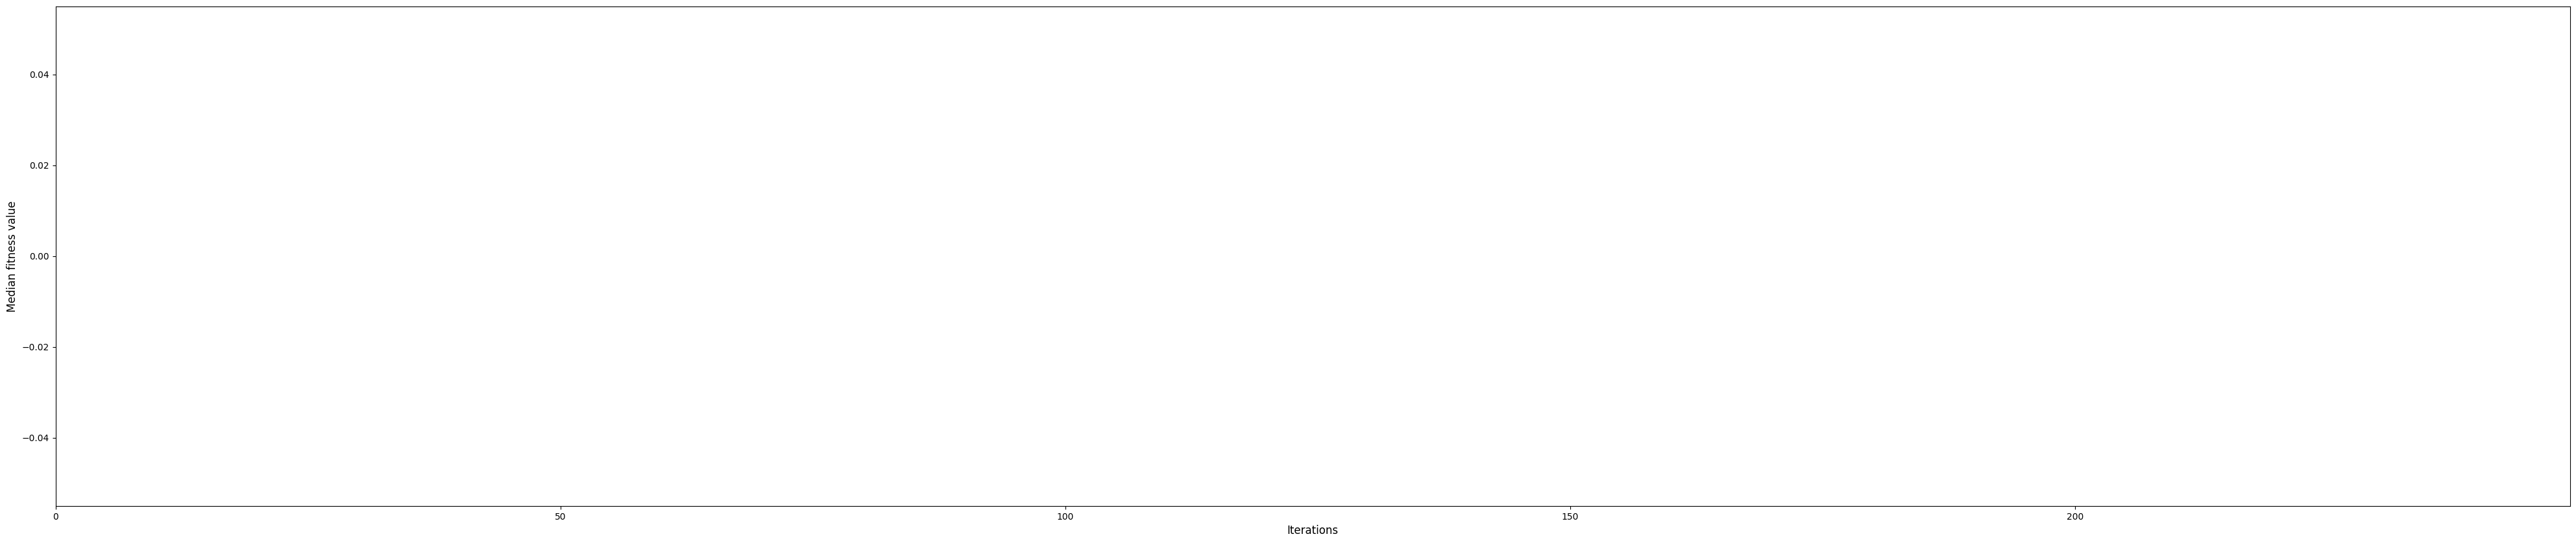

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pymannkendall as mk

# Assuming algorithms is defined and you have x_values and y_values
# Here we use a simplified example for demonstration purposes

means = [pd.Series(values).rolling(24, min_periods=12).mean().values for values in y_values]

fig, ax = plt.subplots(figsize=(50, 10))
plt.xlabel('Iterations', fontsize=12)
plt.ylabel(f'Median {CONSTANT} value', fontsize=12)

lines = []
for i, algorithm in enumerate(algorithms):
    line, = ax.plot([], [], label=algorithm + "---" + mk.original_test(means[i]).trend)
    lines.append(line)

dots = [ax.plot([], [], 'ro')[0] for _ in algorithms]  # Dots for the end of each line


def init():
    # Set max values for x and y axes
    ax.set_xlim(0, max(max(sublist) for sublist in x_values))
    ax.set_ylim(0, max(max(sublist) for sublist in means))
    ax.legend()  # Display the legend
    return lines + dots


def animate(i):
    for j, (line, dot) in enumerate(zip(lines, dots)):
        if i < len(x_values[j]) and i < len(means[j]):
            line.set_data(x_values[j][:i], means[j][:i])
            dot.set_data(x_values[j][i - 1], means[j][i - 1])  # Set the dot at the end of the line
    return lines + dots


ani = animation.FuncAnimation(fig, init_func=init, func=animate, frames=len(x_values[0]), interval=100, blit=True)

# Save the animation as a GIF
gif_path = 'plot_animation.gif'
ani.save(gif_path, writer='imagemagick')

plt.close(fig)

gif_path
